## Feed Forward Networks (FFN) si baza de date MNIST


# PyTorch 

Pentru definirea și antrenarea rețelelor neurale vom folosi librăriile PyTorch și torchvision. Acestea trebuie instalate, dacă lucrați local. Instrucțiunile le găsiți la această [adresă](https://pytorch.org/get-started/locally/).

Documentație (https://pytorch.org/docs/stable/index.html)

Există câteva tipurile primitive ale PyTorch. În primul rând, avem tipul Tensor. Un tensor este un tablou (array) n-dimensional unde fiecare element trebuie să aibă același tip precum frații săi direcți. Un Tensor fără dimensiuni (sau 0-dimensional) se numește scalar. Un Tensor cu o dimensiune se numește tablou, cel cu două dimensiuni matrice (Matrix), iar cel cu trei sau mai multe dimensiuni multidimensional (N-dimensional).
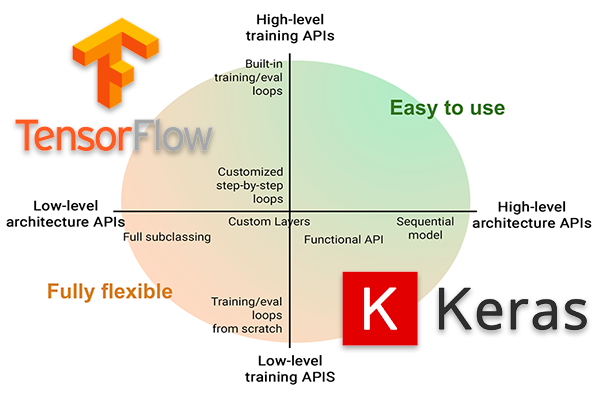


<h2 id="1.-Introducere">1. Introducere<a class="anchor-link" href="#1.-Introducere">¶</a></h2><p>Scopul algoritmilor de invatare automata (sau <em>machine learning</em> de acum incolo) este de a permite unor sisteme de calcul sa ia decizii sau sa faca anumite predictii, fara a fi programate in mod explicit pentru o sarcina anume. Pentru aceasta, exista o etapa de antrenare, care presupune introducerea in sistem a unui volum (preferabil mai mare) de date pentru ajustarea parametrilor algoritmului, astfel incat sarcina dorita sa fie indeplinita cat mai bine.</p>
<p>Pentru o intelege mai buna a tipului de probleme tratate in laborator, urmeaza o scurta clasificare a algoritmilor de machine learning. Dupa tipul de invatare, putem contura urmatoarele clase:</p>
<ul>
<li>Invatare <strong>supervizata</strong>: sistemului ii sunt prezentate o serie de date de intrare etichetate. Sarcinile de baza ale acestui tip de invatare sunt <strong>clasificarea</strong> si regresia (prezicerea unei valori continue pe baza unei intrari oarecare);</li>
<li>Invatare nesupervizata: datele prezentate la intrare nu au etichete. Acesti algoritmi sunt folositi in probleme de clustering (gruparea datelor dupa trasaturi comune, gasirea unor tipare);</li>
<li>Invatare semisupervizata: in acest caz, o parte din setul de date nu are etichete. In prezent este adesea vazuta ca o metoda de a augmenta algoritmi de invatare supervizata;</li>
<li>Reinforcement learning: este radical diferit fata de celelalte tipuri de invatare, in care un agent este pus intr-un mediu dinamic care raspunde prin rasplati sau pedepse in functie de actiuni (un exemplu bun ar fi vehiculele autonome).</li>
</ul>


<h2 id="2.-Formularea-problemei">2. Formularea problemei<a class="anchor-link" href="#2.-Formularea-problemei">¶</a></h2>



<p>Laboratorul de astazi propune clasificarea datelor din baza de date MNIST (cifre de la 0 la 9) folosind un clasificator bazat pe retele multristrat. Mai exact, o retea neuronala formata dintr-un strat de intrare (care contine datele de intrare), (minim) un strat ascuns si un strat de iesire (care contine predictiile de apartenenta la clasa). Functionarea retelei presupune ca fiecare neuron din stratul curent sa participe la valoarea fiecarui neuron din stratul urmator. Practic, pentru a obtine valoarea unui neuron din stratul <em>N+1</em>, fiecare valoare din stratul <em>N</em> este inmultita cu o pondere (<em>weight</em>) <strong>unica pentru fiecare pereche (neuron din stratul <em>N</em>, neuron din stratul <em>N+1</em>)</strong> si se aduna toate aceste produse impreuna cu un deplasament suplimentar (<em>bias</em>). Rezultatul obtinut este trecut printr-o <strong>functie de activare</strong>, care decide daca informatia sa fie propagata, sau nu (ramane 0). Neuronul din stratul de iesire care are cea mai mare valoare este ales castigator, si determina clasa careia apartine esantionul testat.</p>
<p>Toate retelele neuronale se antreneaza iterativ:</p>
<ul>
<li>Un esantion este introdus la intrarea in retea;</li>
<li>Informatia este propagata prin retea;</li>
<li>Pe baza neuronului cu valoarea cea mai mare din stratul de iesire, se verifica daca predictia este buna sau nu;</li>
<li>Daca predictia este gresita, atunci pe baza erorii se reajusteaza ponderile din retea (prin intermediul algoritmului de <strong>backpropagation</strong>). Daca predictia este corecta, nu se intampla nimic;</li>
</ul>
<p>Acesti pasi se repeta pana la indeplinirea unui criteriu de stop (eroarea totala a esantioanelor este suficient de mica, procesul a fost repetat suficient, etc.). Formal, pentru rezolvarea unei probleme de clasificare cu retele neuronale trebuie parcursi o serie de pasi:</p>
<ul>
<li>Analizarea bazei de date (ce forma au datele de intrare, cat de mare este, cate clase exista, etc.);</li>
<li>Alegerea arhitecturii (in cazul retelelor neuronale clasice situatia este mai simpla, fiind necesare doar alegerea numarului de straturi si numarului de neuroni din straturile ascunse, precum si o functie de activare);</li>
<li>Pregatirea bazei de date, care presupune citirea integrala a datelor, daca este suficient de mic setul de date, rearanjarea datelor daca nu vin in formatul potrivit, eventuale prelucrari ale informatiei, impartire in batch-uri, impartirea in set de antrenare, set de validare si set de testare (daca nu este facuta deja impartirea);</li>
<li>Alegerea unui optimizator. <strong>Optimizatorul</strong> este algoritmul care decide in ce directie si cat de puternic sa fie modificate ponderile din retea;</li>
<li>Alegerea unei functii loss (cost). <strong>Functia loss</strong> este cea care ii spune sistemului "cat de gresita" a fost estimarea retelei;</li>
<li>Alegerea parametrilor specifici pentru retele neuronale: <strong>learning rate</strong> (cat de mare poate sa fie pasul facut de o pondere intr-o directie), <strong>dimensiunea unui batch</strong> (esantioanele nu sunt prezentate secvential, ci in grupuri, <em>batch-uri</em>, fapt ce va fi discutat ulterior), <strong>numarul de epoci/iteratii</strong> (cat de multa vreme sa fie antrenata reteaua);</li>
<li>Stabilirea unei metrici de performanta pentru utilizatorul uman (pentru clasificare, cea mai usoara si folosita metrica este <strong>acuratetea clasificarii</strong>, adica ce procent din baza de date a fost clasificat corect). <strong>Metrica de performanta si functia loss pot fi doua functii diferite</strong>, dupa cum se va vedea pe exemplul tratat in continuare;</li>
<li>Antrenarea propriu-zisa a retelei;</li>
<li>Testarea retelei si analizarea rezultatelor (de obicei, pe baza metricilor de performanta).</li>
</ul>
<p>O parte din pasii enumerati mai sus sunt comuni indiferent de clasificatorul ales. Alta parte insa (alegerea optimizatorului, a functiei loss, learning rate-ul, numar epoci, etc.) nu se regaseste, acesti pasi sau parametri specifici fiind inlocuiti conform algoritmului de clasificare dorit.</p>



<h2 id="3.-Pregatirea-bazei-de-date">3. Pregatirea bazei de date<a class="anchor-link" href="#3.-Pregatirea-bazei-de-date">¶</a></h2><p>Seturile de date folosite in machine learning pot contine orice fel de informatie: vizuala (imagini), audio (ex. in cazul algoritmilor care genereaza automat subtitrari, vedeti functia de auto-captioning pe YouTube), text (ex. algoritmi care traduc dintr-o limba in alta), etc.</p>
<p>In functie de ce tip de date vor intra in clasificator pregatirea datelor se poate schimba simtitor:</p>
<ul>
<li>Daca baza de date este suficient de mica (cum este cazul MNIST), toata informatia poate fi incarcata in memorie, fapt ce usureaza introducerea datelor in retea si creste viteza de rulare a algoritmului de antrenare;</li>
<li>Daca baza de date contine un numar mare de imagini (eventual si ele de rezolutie mare), nu se poate incarca toata baza de date in memorie (RAM sau GPU). In acest caz, practica uzuala este pastrarea listei de cai catre imagini impreuna cu etichetele lor de clasa intr-un fisier text. Cand trebuie creat un batch de imagini pentru a fi propagat in retea, se aleg imagini din fisierul text si <b>doar ele vor fi incarcate in memorie</b>.</li>
</ul>
<p>Actualizarea ponderilor se face dupa calculul functiei loss pe un batch intreg. Din acest motiv, nu este o idee buna ca imaginile sa fie ordonate in functie de clasa (mai intai doar imagini de clasa 0, apoi doar de clasa 1, etc.). <b>De asemenea, ajuta ca dupa fiecare epoca sa amestecam imaginile, astfel incat un batch sa nu contina mereu aceleasi imagini de la epoca anterioara</b>.</p>
<h3 id="3.1.-Baza-de-date-MNIST">3.1. Baza de date MNIST<a class="anchor-link" href="#3.1.-Baza-de-date-MNIST">¶</a></h3><p>Probabil cea mai cunoscuta baza de date, MNIST este format din imagini cu cifre scrise de mana. Desi nu mai este de multa vreme dificil atingerea unei performante ridicate (eroare pe setul de test de &lt;1%), ea ramane printre favorite pentru testarea diversilor algoritmi de machine learning.</p>
<p>Structura:</p>
<ul>
<li>70.000 de poze (60.000 pentru antrenare si 10.000 pentru testare)</li>
<li>Fiecare imagine este de dimensiunea 28 x 28 pixeli (grayscale, stocate ca un singur plan de culoare)</li>
</ul>
<p>Tinand cont ca o rețea neurală clasică (perceptron multistrat) nu tine cont de forma trasaturilor, ci doar de numarul lor, imaginea introdusa in stratul de intrare este vectorizata.</p>
<p><img src="./MNIST.png"/></p>
<center>Exemple de imagini din MNIST. Imagine preluata de pe www.wikipedia.org</center><p>Functiile cu care vom incarca baza de date MNIST in memorie sunt urmatoarele:</p>


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as T
import os
import pandas as pd
from torchvision.io import read_image
import pathlib as pt
from torch.utils.data import Dataset
import random
import torchvision.datasets as dset

print(f"pyTorch version {torch.__version__}")
print(f"torchvision version {torchvision.__version__}")
print(f"CUDA available {torch.cuda.is_available()}")

pyTorch version 1.10.1
torchvision version 0.11.2
CUDA available True


In [ ]:
n_epochs = 10
train_bs = 8
test_bs = 8
learning_rate = 0.01


random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [ ]:
# train=0.8
# test=0.2

# data_csv=r"D:\ai intro\Pytorch\data.csv"

# def create_dataset_csv(normal_dir, csv_path):

    
#     normal = sorted(list(pt.Path(normal_dir).rglob("*.png")))

#      # se verifica daca nu exista masti lipsa pentru unul dintre plamani
    

#     # se citesc toate caile catre imagini si masti de segmentare
#     # este important sa fie in aceeasi ordine
    
#     # se creaza un dictionar de liste, pe baza caruia se creaza obiectul de tip pandas.DataFrame
#     dataset_data = {"normal_path": normal}

#     dataset_df = pd.DataFrame(data=dataset_data)
#     dataset_df.to_csv(csv_path, index=True)
#     print(f"Saved dataset csv {csv_path}")

#     return dataset_df

# def split_dataset(dataset_df, train, test , seed=1):
#     """Impartirea setului de date in antrenare, validare si testare in mod aleatoriu

#     Args:
#         dataset_df (pandas.DataFrame): contine caile catre imaginile de input si mastile de segmentare
#         split_per (dict): un dictionare de forma {"train": float, "valid": float, "test": float} ce descrie
#             procentajele pentru fiecare subset
#         seed (int, optional): valoarea seed pentru reproducerea impartirii setului de date. Defaults to 1.
#     """
#     # se amesteca aleatoriu indecsii DataFrame-ului
#     # indexul este un numar (de cele mai multe ori) asociat fiecarui rand
#     indices = dataset_df.index.to_numpy() 
#     total = len(indices)
#     random.seed(seed)
#     random.shuffle(indices)

#     # se impart indecsii in functie de procentele primite ca input
#     train_idx = int(total * train)
#     test_idx = train_idx + int(total * test)

#     train_indices = indices[:train_idx]
#     test_indices = indices[train_idx:test_idx]

#     # print(len(train_indices), len(valid_indices), len(test_indices))

#     # se adauga o noua coloana la DataFrame care specifica in ce subset face parte o imagine si mastile de segmentare asociate
#     dataset_df['subset'] = ""
#     dataset_df.loc[train_indices, "subset"] = "train"
#     dataset_df.loc[test_indices, "subset"] = "test"

#     return dataset_df

# class CustomImageDataset(Dataset):
#     def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
#         self.img_labels = pd.read_csv(annotations_file)
#         self.img_dir = img_dir
#         self.transform = transform
#         self.target_transform = target_transform

#     def __len__(self):
#         return len(self.img_labels)

#     def __getitem__(self, idx):
#         img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
#         image = read_image(img_path)
#         label = self.img_labels.iloc[idx, 1]
#         if self.transform:
#             image = self.transform(image)
#         if self.target_transform:
#             label = self.target_transform(label)
#         return image, label

In [ ]:
transforms = T.Compose([
        T.CenterCrop(600),
        T.ToTensor(), # converts a PIL.Image or numpy array into torch.Tensor
        T.Normalize((0.1307,), (0.3081,))# Normalize the dataset with mean and std specified
        
        
        ])

# Data=r"D:\ai intro\AI intro\5. Retele Neurale\covid_dataset"
# dataset_df=create_dataset_csv(Data,data_csv)
# dataset_df=split_dataset(dataset_df,train,test)
# train_ds=CustomImageDataset(dataset_df, annotations_file=data_csv,img_dir=Data,transform=transforms)


data_dir=r"D:\ai intro\AI intro\5. Retele Neurale\covid_dataset"
train_ds = dset.ImageFolder(data_dir+'/train',transform=transforms)
test_ds = dset.ImageFolder(data_dir+'/test',transform=transforms)

train_loader = torch.utils.data.DataLoader(train_ds, shuffle=True, batch_size=train_bs)
test_loader = torch.utils.data.DataLoader(test_ds, shuffle=False, batch_size=test_bs)

In [ ]:
print("Nr de imagini in setul de antrenare", len(train_ds))
print("Nr de imagini in setul de test", len(test_ds))
print("Dim primei imagini din Dataset", train_ds[0][0].shape)
print("Etichete pt prima imagine", train_ds[0][1])

Nr de imagini in setul de antrenare 121
Nr de imagini in setul de test 14
Dim primei imagini din Dataset torch.Size([3, 600, 600])
Etichete pt prima imagine 0


In [ ]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [ ]:
print("Dim unei batch de imagini", example_data.shape)
print("Dim unei batch de etichete", example_targets.shape)

Dim unei batch de imagini torch.Size([8, 3, 600, 600])
Dim unei batch de etichete torch.Size([8])


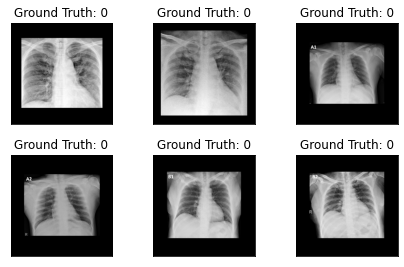

In [ ]:
# afisarea primelor 25 de imagini
for i in range(6):
    # definirea subplot-urilor
    plt.subplot(2, 3, i+1)
    plt.tight_layout()

    # afisarea imaginilor folosind obiectul de tip Dataset
    # plt.imshow(test_ds[i][0][0], cmap='gray')
    # plt.title(f"Ground Truth: {test_ds[i][1]}")

    # afisarea imaginilor "extragand" primul batch de date din Dataloader
    plt.imshow(example_data[i][0], cmap='gray')
    plt.title("Ground Truth: {}".format(example_targets[i]))

    plt.xticks([])
    plt.yticks([])
    # afisarea figurii
plt.show()


<h2 id="4.-Arhitectura-retelei">4. Arhitectura retelei<a class="anchor-link" href="#4.-Arhitectura-retelei">¶</a></h2><p>In acest moment exista o multitudine de arhitecturi neurale folosite in diverse sarcini de machine learning. Feed Forward Networks (FFNs) sunt o clasa de retele neuronale in care pentru obtinerea etichetei unui esantion, informatia trebuie propagata mereu inainte, catre straturile superioare din structura ierarhica a retelei. Dupa cum a fost mentionat anterior, pentru acest laborator introductiv, se va folosi o arhitectura de tip perceptron multistrat. Tinand cont de modul in care se definesc modelele in Tensorflow, vom parcurge urmatorii pasi:</p>

Conform arhitecturii studiate in laboratorul curent, in stratul de intrare fiecare intrare trebuie sa corespunda unui pixel din imaginea de intrare. Deoarece imaginile sunt reprezentate aici ca tablouri 2-dimensionale (dimensiunea 28x28), trebuie sa transformam aceasta matrice intr-un tablou 1-dimensional cu 784 de elemente. 
In PyTorch, vectorul de caracteristici de intrare trebuie sa aibe urmatoarea structura:

    numar de exemple de antrenare la fiecare iteratie (dimensiune batch) x numar de caracteristici
    
De exemplu: 100 x 784 (batch_size, input_size)

Pentru asta vom folosi funcția `view`, care redimensionează (schimbă shape-ul) unui tensor, păstrând datele la fel. [Link documentație](https://pytorch.org/docs/stable/generated/torch.Tensor.view.html#torch.Tensor.view)

In [ ]:
# redimensionam setul de date cu funcția view
flatten_data = example_data.view(example_data.shape[0], -1)
print(flatten_data.shape)

torch.Size([8, 1080000])


In [ ]:
# Nr de clase unice il putem afla din dataset folosind atributul `targets`
n_classes = len(np.unique(train_ds.targets))
print(np.unique(train_ds.targets))

[0 1]


In [ ]:
# definim arhitectura retelei neurale multristrat
network = nn.Sequential(
    nn.Linear(in_features=1080000 , out_features=100),  # strat ascuns neural cu 100 de neuroni
    nn.ReLU(),  # functia de activare relu
    nn.Linear(in_features=100, out_features=10), # strat ascuns neural cu 10 de neuroni
    nn.ReLU(), # functia de activare relu
    nn.Linear(in_features=10, out_features=n_classes) # strat de iesire neural cu 10 de neuroni (10 clase)
)
print(network)

Sequential(
  (0): Linear(in_features=1080000, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=2, bias=True)
)



<h2 id="5.-Functii-loss">5. Functii loss<a class="anchor-link" href="#5.-Functii-loss">¶</a></h2><p>Pentru a putea imbunatati arhitectura noastra trebuie sa stim cat de bine, sau mai bine zis, cat de rau, clasifica datele noastre. Pentru a exprima cantitativ conceptul de "cat de rau se descurca" se foloseste o functie de cost (denumita mai frecvent loss, in literatura de specialitate). O functie loss pentru o problema de clasificare primeste la intrare etichetele corecte ale esantioanelor si neuronii din stratul de iesire (toti neuronii, desi stim ca neuronul castigator este cel cu valoarea cea mai mare).</p>
<p>Cea mai folosita functie loss pentru clasificare este <b>Cross Entropy</b> care are valori cu atat mai mari atunci cu cat diferenta intre doua distributii de probabilitati este mai mare. Pentru aceasta, trebuie sa transformam atat etichetele, cat si neuronii de iesire in distributii de probabilitati. In cazul etichetelor corecte, acest procedeu este simplu: distributia care corespunda etichetei $i$ are valoarea 1 pe pozitia $i$ si 0 in rest. Valorile neuronilor de iesire sunt transformate folosind functia Softmax:
$$Y_{i}=\frac{e^{X_{i}}}{\sum_{i=0}^{nr\_etichete-1}e^{X_i}}$$
Astfel, suma neuronilor de iesire devine 1, iar toate valorile sunt &gt;0, obtinand o distributie de probabilitati valida.</p>
<p>Majoritatea functiilor de cost sau eroare pot fi folosite, atat timp cat etichetele si neuronii sunt prelucrati adecvat: eroarea medie, eroarea patratica medie (des folosite in probleme de regresie), etc.</p>

**Atenție!!!** Funcția de `CrossEntropyLoss` ia ca și input indicii etichetelor, nu vectori one-hot encoded (doar 1 și 0). De asemenea, funcția include operația de softmax, ceea ce înseamnă cu nu mai trebuie adăugat un strat separat de softmax în rețea (ca în Tensorflow/Keras).
<p>Pentru a specifica functia loss in cazul nostru:</p>


In [ ]:
# Specificarea functiei loss
criterion = nn.CrossEntropyLoss()

<h2 id="6.-Optimizatori">6. Optimizatori<a class="anchor-link" href="#6.-Optimizatori">¶</a></h2><p>Pentru a ajusta parametrii unei retele (ponderile si deplasamentele) trebuie specificat un <b>optimizator</b> care decide strategia de modificare in functie de gradientii obtinuti cu ajutorul functiei loss. Algoritmul de baza, in ceea ce priveste optimizatorii, este denumit <b>"Stochastic Gradient Descent" (SGD)</b> si a fost folosit multa vreme de majoritatea persoanelor care lucreaza in domeniu. Plecand de la acesta, au aparut mai multi algoritmi imbunatatiti care accelereaza procesul de minimizare a erorii. Dintre acesti algoritmi mai noi amintim:</p>
<ul>
<li><b>Adam (cel mai folosit in acest moment)</b></li>
<li>Adadelta</li>
<li>Adagard</li>
<li>SGD with momentum</li>
<li>RMSprop</li>
</ul>
<center>
<video align="center" controls height="240" width="320" src="opt_comp_1.mp4"/></video>
<video align="center" controls height="240" width="320" src="opt_comp_2.mp4"/></video>
</center>

<center>Comparatie intre mai multi optimzatori</center><p>Optimizatorul necesita specificarea <b>dimensiunii pasului de optimizare, denumit si rata de invatare (<i>learning rate</i>)</b>, care in exemplul nostru va fi tinut constant $10^{-5}$.</p>
<p>Pentru a specifica modul in care trebuie modificati parametrii retelei, trebuie specificat faptul ca un pas de antrenare inseamna <b>minimizarea functiei loss mai sus definita</b>:</p>


In [ ]:
# definirea optimizatorului
opt = torch.optim.Adam(network.parameters(), lr=0.001)


<h2 id="7.-Bucla-de-invatare">7. Bucla de invatare<a class="anchor-link" href="#7.-Bucla-de-invatare">¶</a></h2><p>Avand definite diversele componente ale retelei, trebuie incarcate datele, scrisa metrica de acuratete, definiti hiperparametrii (precum dimensiunea unui batch, numarul de epoci, numarul de iteratii per epoca, si altii in alte cazuri) se poate defini bucla in care se va antrena reteaua.</p>
<h3 id="7.1.-Salvarea-si-incarcarea-retelei">7.1. Salvarea si incarcarea retelei<a class="anchor-link" href="#7.1.-Salvarea-si-incarcarea-retelei">¶</a></h3><p>Pentru a putea fi folosita ulterior (sau reluata antrenarea, in cazul opririi acesteia), reteaua se poate salva folosind clasa <b>Saver</b>. Pentru aceasta se creeaza un obiect de tip Saver, se salveaza starea sesiunii cu metoda <b>save</b>, iar apoi este reincarcata cu metoda <b>restore</b>.</p>


In [505]:
n_epochs = 1

total_acc = []
total_loss = []

network.train()
for ep in range(n_epochs):
    predictions = []
    targets = []
    
    loss_epoch = 0
    for data in train_loader:
        ins, tgs = data
        # redimensionam tensor-ul input
        ins = ins.view(ins.shape[0], -1)
        # print(ins.shape)
        # print(tgs.shape)
        
        # seteaza toti gradientii la zero, deoarece PyTorch acumuleaza valorile lor dupa mai multe backward passes
        opt.zero_grad()

        # se face forward propagation -> se calculeaza predictia
        output = network(ins)

        # se calculeaza eroarea/loss-ul
        loss = criterion(output, tgs)

        # se face backpropagation -> se calculeaza gradientii
        loss.backward()

        # se actualizează weights-urile
        opt.step()

        loss_epoch = loss_epoch + loss.item()

        with torch.no_grad():
            network.eval()
            current_predict = network(ins)

            # deoarece reteaua nu include un strat de softmax, predictia finala (cifra) trebuie calculata manual
            current_predict = nn.Softmax(dim=1)(current_predict)
            current_predict = current_predict.argmax(dim=1)
            # print(current_predict.shape)
            predictions = np.concatenate((predictions, current_predict.numpy()), axis=0)
            targets = np.concatenate((targets, tgs))
    
    total_loss.append(loss_epoch/train_bs)
    
    print(predictions.shape)
    print(len(targets))
    # Calculam acuratetea
    acc = np.sum(predictions==targets)/len(predictions)
    total_acc.append(acc)
    print(f'Epoch {ep}: error {loss_epoch/train_bs} accuracy {acc*100}')

    # salvam ponderile modelului dupa fiecare epoca
    torch.save(network, 'my_model.pth')

(121,)
121
Epoch 0: error 3.510144092142582 accuracy 58.67768595041323


In [506]:
n_epochs = 15

total_acc = []
total_loss = []

network.train()
for ep in range(n_epochs):
    predictions = []
    targets = []
    
    loss_epoch = 0
    for data in train_loader:
        ins, tgs = data
        # redimensionam tensor-ul input
        ins = ins.view(ins.shape[0], -1)
        # print(ins.shape)
        # print(tgs.shape)
        
        opt.zero_grad()

        # se face forward propagation -> se calculeaza predictia
        output = network(ins)
        
        # se calculeaza eroarea/loss-ul
        loss = criterion(output, tgs)

        # se face backpropagation -> se calculeaza gradientii
        loss.backward()

        # se actualizează weights-urile
        opt.step()

        loss_epoch = loss_epoch + loss.item()

        with torch.no_grad():
            network.eval()
            current_predict = network(ins)

            # deoarece reteaua nu include un strat de softmax, predictia finala (cifra) trebuie calculata manual
            current_predict = nn.Softmax(dim=1)(current_predict)
            current_predict = current_predict.argmax(dim=1)
            # print(current_predict.shape)
            predictions = np.concatenate((predictions, current_predict.numpy()), axis=0)
            targets = np.concatenate((targets, tgs))
    
    total_loss.append(loss_epoch/train_bs)
    
    # Calculam acuratetea
    acc = np.sum(predictions==targets)/len(predictions)
    total_acc.append(acc)
    print(f'Epoch {ep}: error {loss_epoch/train_bs} accuracy {acc*100}')

    # salvam ponderile modelului dupa fiecare epoca
    torch.save(network, 'my_model.pth')

Epoch 0: error 1.3056166768074036 accuracy 59.50413223140496
Epoch 1: error 1.3058976531028748 accuracy 59.50413223140496
Epoch 2: error 1.2920963428914547 accuracy 59.50413223140496
Epoch 3: error 1.2915980741381645 accuracy 59.50413223140496
Epoch 4: error 1.2907449752092361 accuracy 59.50413223140496
Epoch 5: error 1.3057015389204025 accuracy 59.50413223140496
Epoch 6: error 1.2897330820560455 accuracy 59.50413223140496
Epoch 7: error 1.3056469857692719 accuracy 59.50413223140496
Epoch 8: error 1.3054071068763733 accuracy 59.50413223140496
Epoch 9: error 1.305387232452631 accuracy 59.50413223140496
Epoch 10: error 1.3053357899188995 accuracy 59.50413223140496
Epoch 11: error 1.2887202948331833 accuracy 59.50413223140496
Epoch 12: error 1.2881192937493324 accuracy 59.50413223140496
Epoch 13: error 1.3055924028158188 accuracy 59.50413223140496
Epoch 14: error 1.2870884910225868 accuracy 59.50413223140496


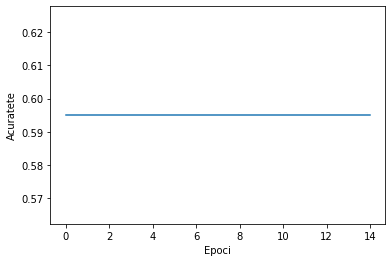

In [507]:
# vizualizare evolutie acuratete
ep = np.arange(n_epochs)
plt.xlabel('Epoci')
plt.ylabel('Acuratete')
plt.plot(ep, total_acc, label='Acuratetea pe setul de antrenare')
plt.show()

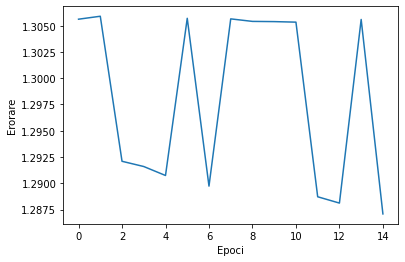

In [508]:
# vizualizare evolutie eroare
ep = np.arange(n_epochs)
plt.xlabel('Epoci')
plt.ylabel('Erorare')
plt.plot(ep, total_loss, label='Eroarea pe setul de antrenare')
plt.show()


<h2 id="8.-Testarea-retelei">8. Testarea retelei<a class="anchor-link" href="#8.-Testarea-retelei">¶</a></h2><p>Odata terminata antrenarea retelei, putem testa pe un set de date noi. Veti observa ca structura de la bucla de antrenare ne va ajuta in continuare:</p>


In [512]:
# incarcam ponderile modelul antrenat
network = torch.load('my_model.pth')

test_labels = test_ds.targets

predictions = []

network.eval()
for data in test_loader:
    ins, tgs = data
    ins = ins.view(ins.shape[0], -1)
    current_predict = network(ins)
    current_predict = nn.Softmax(dim=1)(current_predict)
    current_predict = current_predict.argmax(dim=1)

    predictions = np.concatenate((predictions, current_predict.numpy()))

acc = np.sum(predictions == test_labels)/len(predictions)
print(f'Test accuracy is {acc*100}')

Test accuracy is 50.0


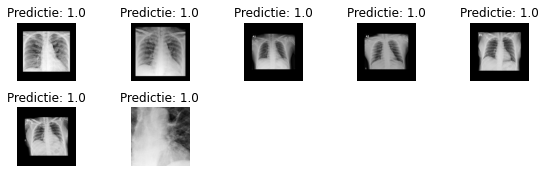

In [516]:
plt.figure(figsize=(8, 6))
for i in range(7):
    plt.subplot(5, 5, i+1)
    image = test_ds[i][0][0]
    pred = predictions[i]
    
    plt.imshow(image, cmap='gray')
    plt.title(f'Predictie: {pred}')
    
    plt.axis('off')
plt.tight_layout(pad=1.0)
plt.show()

# Exercițiu: 

Antrenați o rețea neurală multistrat pentru diagnosticarea COVID-19 în radiografii pulmonare și raportați performanțele pe setul de testare. 

Pentru a încărca un dataset custom în pytorch, urmăriți pași prezentați [aici](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html#creating-a-custom-dataset-for-your-files).

Setul de date:
- Sănătoși: 79 radiografii pulmonare
- COVID-19: 70 radiografii pulmonare

Radiografia pulmonară (X-ray) este frecvent utilizată pentru a analiza starea de sănătate a plămânilor unui pacient.

<p><img src="./exemplu.jpg"/></p>

Tips: 
1.	Imaginile au dimensiuni diferite, în etapa de pre-procesare trebuie sa vă asigurați că aduceti toate imaginile la aceași dimensiune.
2.  Pentru o antrenare mai rapidă, redimensionați imaginile la o dimensiune mică (de ex: 64x64). 
3.	Impărțiți setul de date în 80% pentru antrenare, 20% pentru testare.